<a href="https://colab.research.google.com/github/atootdev/HRW_App/blob/master/Foodhub_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [49]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [50]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [51]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [52]:
food_data = pd.read_csv('/content/drive/MyDrive/ml_course/foodhub_project/foodhub_order.csv')

In [53]:
food_data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [54]:
food_data.shape

(1898, 9)

#### Observations:

*   There are 1898 rows and 9 columns present in the data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [55]:
food_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [56]:
food_data = food_data.astype({"order_id": object, "customer_id": object})

#### Observations:

*   The are originally three different datatypes in the different columns these include, int64, object, and float64
*   The datatype for rating however is an object and should be a numerical type
*   Since the order id and customer id are unique identifiers we'll change their type to object. This will make it easier when analyzing the data.







### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [57]:
food_data.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [58]:
food_data.duplicated().sum()

0

In [59]:
food_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [60]:
food_data['rating'].value_counts(normalize=True)

,proportion
rating,
Not given,0.387777
5,0.309800
4,0.203372
3,0.099052


Here we can see that 'Not given' makes uo 38% of the data in 'rating', since this makes up most of the data we will replace it with NaN values.

In [61]:
food_data['rating'] = food_data['rating'].replace('Not given',np.nan)

food_data['rating'] = food_data['rating'].astype(float)

#### Observations:


*   There are 0 null values in the dataset suggesting there are no missing values
*   There are 0 duplicates in the dataset
*   The column 'rating' had string values for missing data called 'Not given', these were replaced with 'NaN' float types.





### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [62]:
food_data.describe()

,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000000,1162.000000,1898.000000,1898.000000
mean,16.498851,4.344234,27.371970,24.161749
std,7.483812,0.741478,4.632481,4.972637
min,4.470000,3.000000,20.000000,15.000000
25%,12.080000,4.000000,23.000000,20.000000
50%,14.140000,5.000000,27.000000,25.000000
75%,22.297500,5.000000,31.000000,28.000000
max,35.410000,5.000000,35.000000,33.000000


#### Observations:



*   There are 1898 items in each row
*   There is a wide range for the cost of order but the average cost of 16.49 is close to the median of 14.14
*   The minimum rating is 3 and the max 5, with an average of 4.34
*   food preparation time and food delivery time are nearly the same with low ranges and averages close to their median


*   The minimum time taken to prepare the food is 20 minutes
*   The average time taken to prepare the food is 27.37 minutes
*   The maximum time taken to prepare the food is 35 minutes






### **Question 5:** How many orders are not rated? [1 mark]

In [63]:
food_data['rating'].isna().sum()

736

#### Observations:


*   There are 736 orders that are not rated



### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

First lets explore the numerical columns

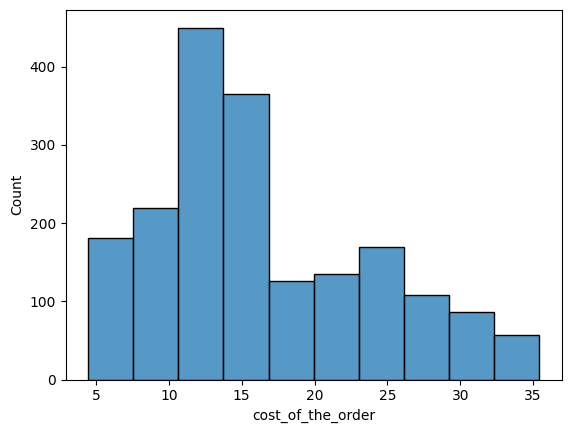

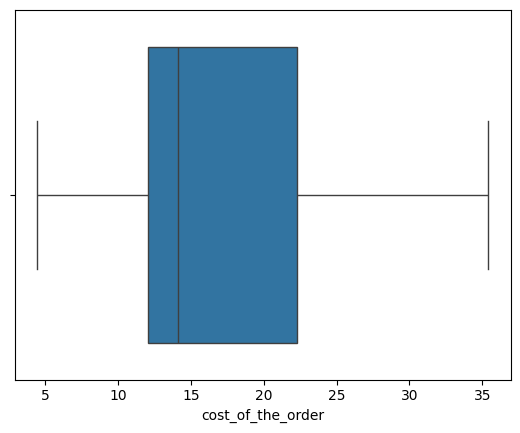

In [93]:
sns.histplot(data=food_data, x='cost_of_the_order', bins = 10);
plt.show()
sns.boxplot(data=food_data, x='cost_of_the_order');
plt.show()

*   *Most of the orders cost between $10 - $15*
*   *There are no outliers in the data*
*   *Data is slightly skewed to the left*
*   *There is a slight peak at $25*

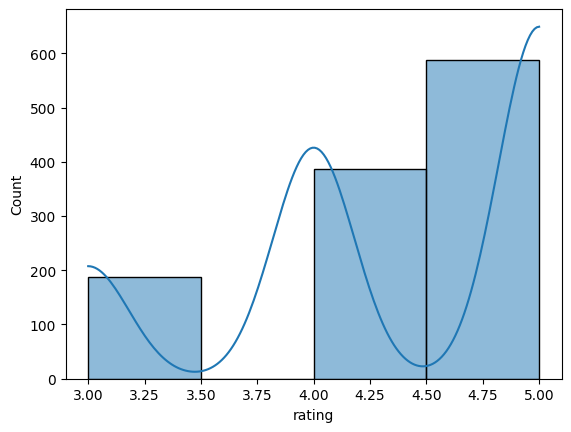

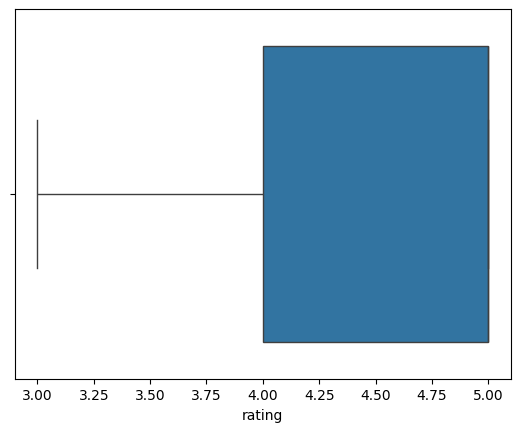

In [94]:
sns.histplot(data=food_data, x='rating', bins = 4,stat = 'count',kde = True);
plt.show()
sns.boxplot(data=food_data, x='rating');
plt.show()



*   *The majority of ratings are a 5*
*   *One thing to note is that there are no ratings under 3*





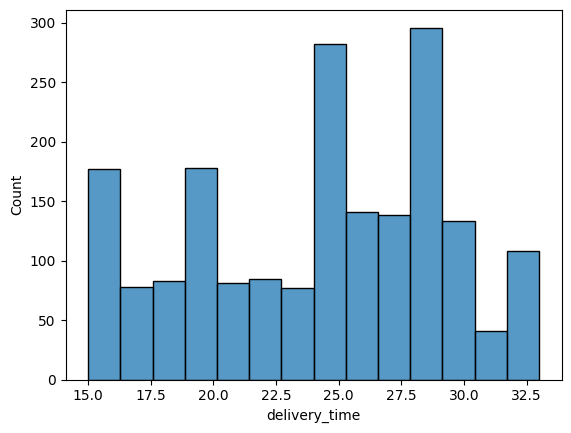

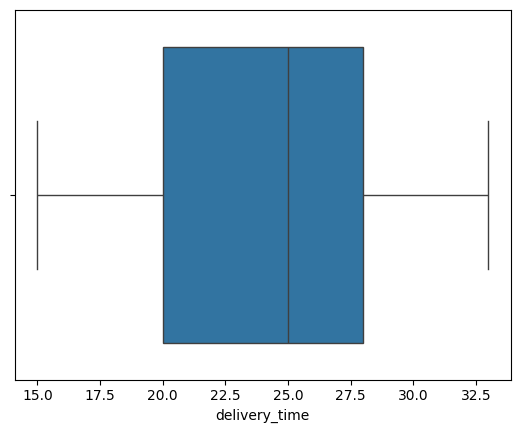

In [66]:
sns.histplot(data=food_data, x='delivery_time');
plt.show()
sns.boxplot(data=food_data, x='delivery_time');
plt.show()

*   *We can observe that 75% of all orders take less than 28min to deliver*
*   *There no outliers in the data*
*   *Some orders may be delivered faster then others due to distance or traffic conditions*

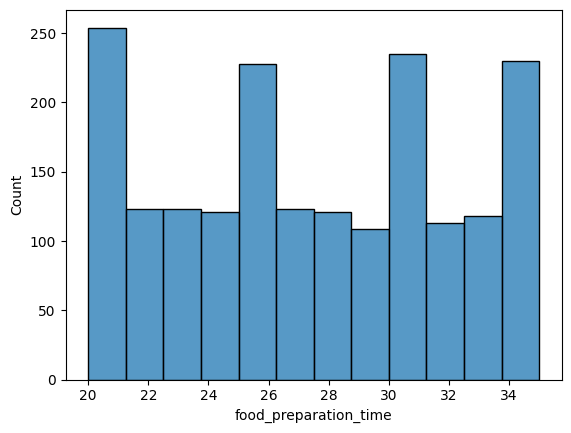

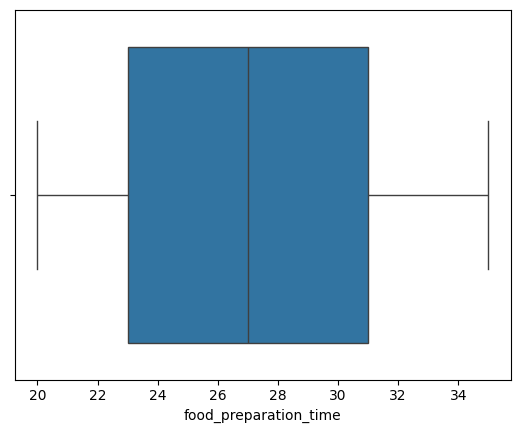

In [67]:
sns.histplot(data=food_data, x='food_preparation_time');
plt.show()
sns.boxplot(data=food_data, x='food_preparation_time');
plt.show()

*   *We can obeserve that the data has many modes*
*   *It takes an average of 27min to prepare the food*
*   *There are no outliers in the data*

Next we'll explore the categorical columns

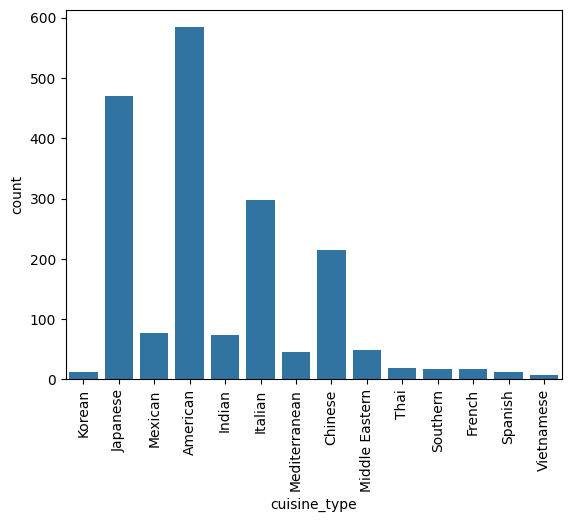

In [68]:
plt.xticks(rotation=90)
sns.countplot(data=food_data, x='cuisine_type');
plt.show()

*   *Most of the orders are from American restaurants*
*   *Japanese is second followed by Italian and Chinese*
*   *All other cuisines have much fewer orders in comparison*

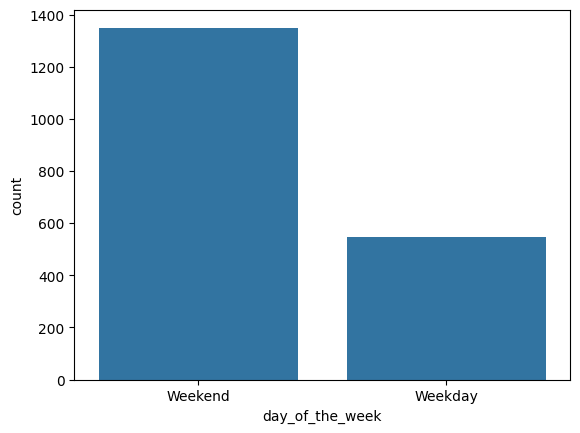

In [69]:
sns.countplot(data=food_data, x='day_of_the_week');
plt.show()

*   *We can observe that the majority of orders are placed on Weekends*

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [70]:
food_data['restaurant_name'].value_counts().head()

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


In [71]:
food_data['restaurant_name'].value_counts(normalize=True).head()

,proportion
restaurant_name,
Shake Shack,0.115385
The Meatball Shop,0.069547
Blue Ribbon Sushi,0.062698
Blue Ribbon Fried Chicken,0.050580
Parm,0.035827


In [72]:
food_data['restaurant_name'].value_counts(normalize=True).head().sum()

0.33403582718651215

#### Observations:


*   The five most popular restaurants to order from are the Shack Shack with 219 orders, The Meatball Shop with 132 orders, Blue Ribbon Sushi with 119 orders, Blue Ribbon Fried Chicken with 96 orders and Parm with 68 orders.
*   Shake Shack makes up 11% of all orders
*   The top 5 restaurants make up 33% of all orders





### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [73]:
food_data[food_data['day_of_the_week'] =='Weekend'].groupby('cuisine_type').count().sort_values(by = 'order_id',axis = 0, ascending=False).head()

,order_id,customer_id,restaurant_name,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
cuisine_type,,,,,,,,
American,415,415,415,415,415,257,415,415
Japanese,335,335,335,335,335,199,335,335
Italian,207,207,207,207,207,110,207,207
Chinese,163,163,163,163,163,107,163,163
Mexican,53,53,53,53,53,32,53,53


#### Observations:


*   American cuisine is the most popular cuisine on weekends with 415 orders
*   Japanese cuisine is second with 335 orders followed by Italian with 207 orders



### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [74]:
(food_data[(food_data['cost_of_the_order']>20)]['cost_of_the_order'].count() / food_data['cost_of_the_order'].count()) * 100

29.24130663856691

#### Observations:


*   29.24 percent of all orders cost more than 20 dollars




### **Question 10**: What is the mean order delivery time? [1 mark]

In [75]:
food_data['delivery_time'].mean()

24.161749209694417

#### Observations:


*   The average order delivery time is 24.16 minutes




### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [76]:
food_data['customer_id'].value_counts()[0:3]

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations:


*   The top 3 most frequent customers are customer id's 52832 with 13 orders, 47440 with 10 orders, and 83287 with 9 orders



### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


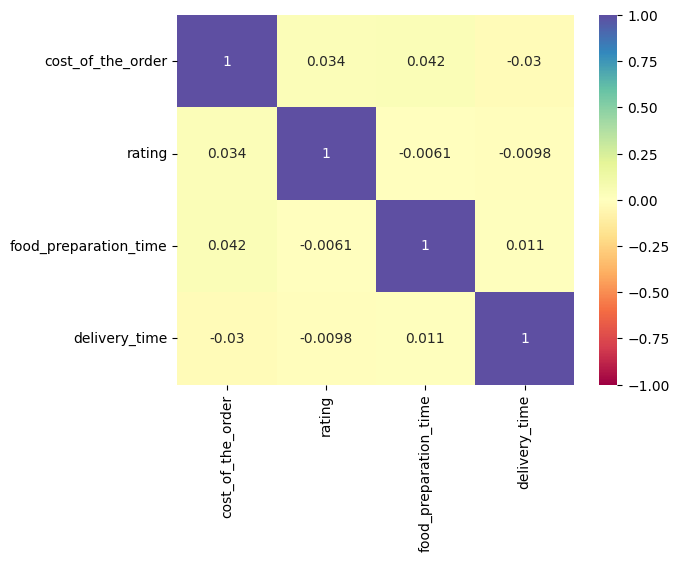

In [77]:
corr_matrix = food_data.select_dtypes(include='number').corr()
sns.heatmap(data = corr_matrix, annot = True, cmap = 'Spectral', vmin = -1, vmax = 1);
plt.show()

There is a weak correlation between all the numerical variables

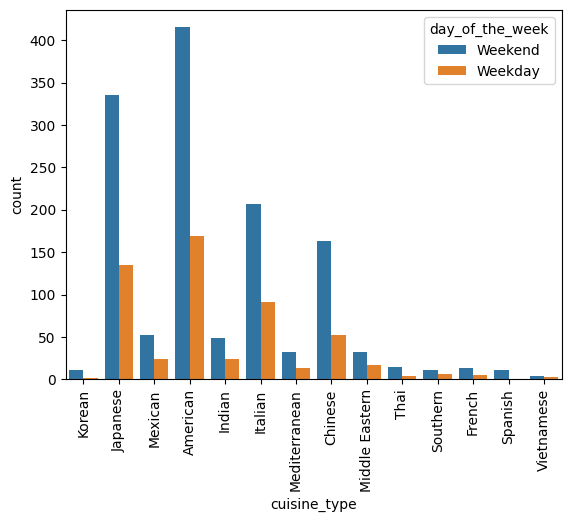

In [78]:
sns.countplot(food_data,x='cuisine_type',hue= 'day_of_the_week')
plt.xticks(rotation=90)
plt.show()



*   The type of cuisine does not change much with regards to what day of the week, however there are many more orders on weekends then weekdays as seen before



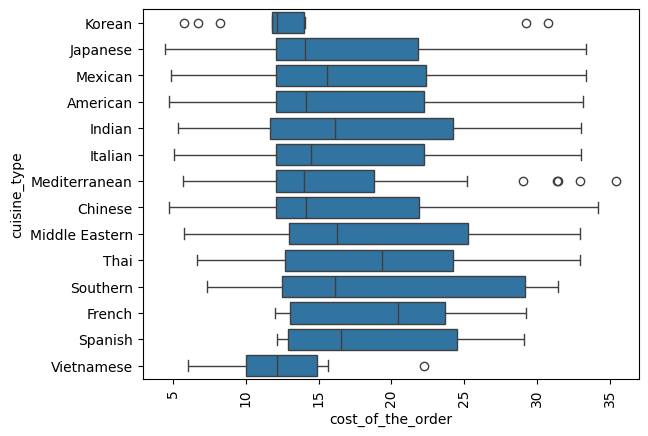

In [79]:
sns.boxplot(food_data,x='cost_of_the_order',y='cuisine_type')
plt.xticks(rotation=90)
plt.show();



*   We can see that the range of cost is fairly similar across most cuisine types with the lowest range being Vietnamese
*   There are outliers present in Korean, Mediterranean and Vietnamese



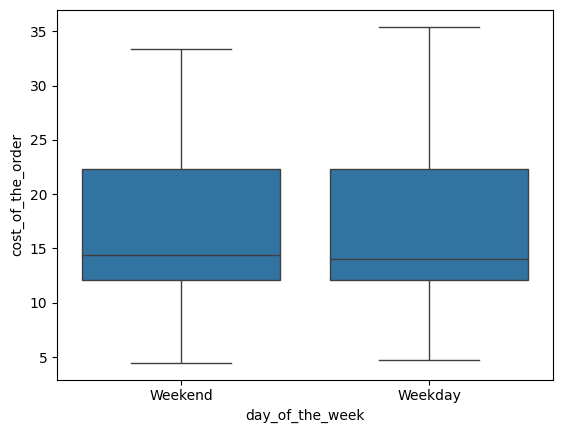

In [80]:
sns.boxplot(food_data,x='day_of_the_week',y='cost_of_the_order')
plt.show()



*   Food cost does not change with the day of the week even though Weekends are more popular



<Figure size 3000x2000 with 0 Axes>

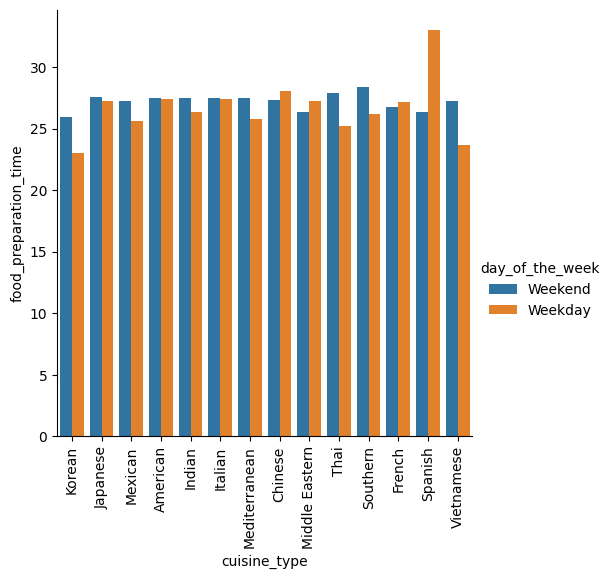

In [81]:
plt.figure(figsize=(30,20))
sns.catplot(data=food_data, x='cuisine_type', y='food_preparation_time', hue='day_of_the_week',kind='bar', errorbar=None);
plt.xticks(rotation=90)
plt.show()

<Figure size 3000x2000 with 0 Axes>

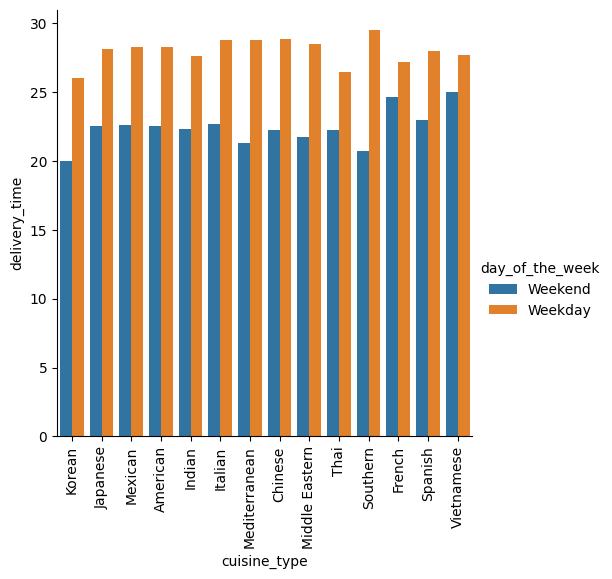

In [82]:
plt.figure(figsize=(30,20))
sns.catplot(data=food_data, x='cuisine_type', y='delivery_time', hue='day_of_the_week',kind='bar', errorbar=None);
plt.xticks(rotation=90)
plt.show()



*   Food preparation time is generally pretty even across all cuisines and day of the week
*   Delivery times are faster on Weekends across all cuisine types



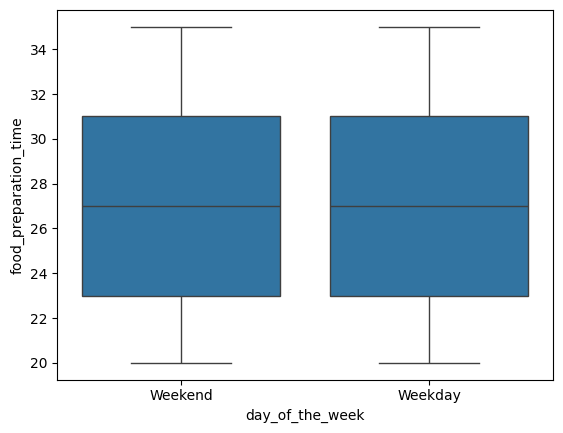

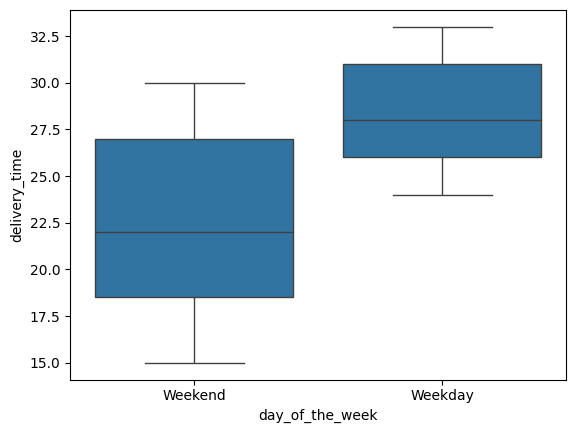

In [83]:
sns.boxplot(food_data,x='day_of_the_week',y='food_preparation_time')
plt.show()
sns.boxplot(food_data,x='day_of_the_week',y='delivery_time')
plt.show()



*   We can see that food preparation time does not change between the days of the week
*   However the delivery times are different with Weekday orders taking more time, with the minimum being 24min and the max 32.5min, versus 15min and 30min on Weekends



### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [84]:
df = food_data.groupby(['restaurant_name'])['rating'].mean().reset_index()

In [85]:
df1 = food_data.groupby(['restaurant_name'])['rating'].count().reset_index()

In [86]:
df1.rename(columns={'rating': 'rating count'}, inplace=True)

In [87]:
df2 = df.merge(df1, on='restaurant_name')

In [88]:
df2[(df2['rating']>4) & (df2['rating count']>50)]

,restaurant_name,rating,rating count
20,Blue Ribbon Fried Chicken,4.328125,64
21,Blue Ribbon Sushi,4.219178,73
136,Shake Shack,4.278195,133
153,The Meatball Shop,4.511905,84


#### Observations:


*   There are four restaurants with more than 50 ratings and an average rating greater then 4
*   The four restaurants are 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack', and 'The Meatball Shop'
*   This correlates with the list of top 5 restaurants by orders
*   The Meatball Shop was the highest rated with a mean rating of 4.511905 with 84 customers ratings
*   Shake Shack had the most ratings with 133







### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [89]:
revenue = 0
income = 0

cost = pd.Series(food_data['cost_of_the_order'])

for i in range(len(cost)):
    if (cost[i] > 5) & (cost[i] < 20):
        income = cost[i]*0.15
    elif (cost[i] > 20):
        income = cost[i]*0.25
    else:
        income = 0
    revenue = revenue + income

print(revenue)

6166.302999999994


#### Observations:


The revenue generated is 6166.30 across all the orders

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [90]:
food_data['total_order_time'] = food_data[['food_preparation_time', 'delivery_time']].sum(axis=1)

In [91]:
(food_data[(food_data['total_order_time'])>60]['total_order_time'].count() / food_data['total_order_time'].count())*100

10.537407797681771

#### Observations:


*   There are 200 orders that take more than 60 minutes to prepare and deliver
*   This accounts for 10.54% of all total orders
*   The average order takes about 51.53 minutes






### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [92]:
food_data.groupby(['day_of_the_week'])['delivery_time'].mean()

,delivery_time
day_of_the_week,
Weekday,28.340037
Weekend,22.470022


#### Observations:


*   The average order time on Weekdays is 28.34 minutes versus 22.47 minutes on Weekends
*   On average orders placed on the Weekends are 6 minutes faster



### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  The top cuisine choices are American, Japense, Italian, and Chinese in that order, with a sharp drop off across all other cuisines.
*   38% of orders did not receive a rating and none of the ratings fell under 3 suggesting only satisfied customers reviewed their order.
*   Demand is much higher on weekends however this does not seem to affect cuisine choice but we did observe faster delivery times.
*   Cost was relatively the same across cuisines, however there were still peaks on the low and high end. I initially presumed this was because some orders had several items but there was a low correlation between cost and preparation time. It may be that students make up more of the orders on the lower end and professionals on the higher end.
*   Preperation times were actually quite the same between Weekday and Weekend but delivery times were much faster on Weekends suggesting traffic during the day may be a factor.

### Recommendations:

*  Since more orders are placed on the Weekends it may be beneficial to improve marketing for Weekdays to increase sales.
*   Delivery times were much faster on Weekends so it would be worth analyzing why that is to decrease delivery times on Weekdays.
*   Improving the ratings system would provide a better analysis on customer satisfaction, this could be done by removing 'Not given' or provide an incentive for customers to provide a rating.
*   Promote other cuisine types that aren't as popular by providing offers, this could boost sales from these restaurants.


---